# Data Exploration

In this Notebook we will quickly explore the data that has been downloaded and processed.

In [5]:
!pip install dfsummarizer

import utils.display as disp
import utils.config as cfg
import pandas as pd


In [6]:

path_to_partitioned = cfg.get_path_to_partitioned_data()


# Explore the training data

We use the config utility to get the path to our training data and inspect it

In [7]:
train_data = path_to_partitioned + "/train.csv"
train_df = pd.read_csv(train_data)
train_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,112487478,62389053,Caucasian,Female,[80-90),?,Physician Referral,6,7,4,...,No,No,No,No,No,No,No,No,Yes,1
1,172075704,79818876,Caucasian,Male,[60-70),?,Clinic Referral,22,1,7,...,No,No,No,No,No,No,No,No,Yes,1
2,130609104,25034400,AfricanAmerican,Male,[60-70),?,Physician Referral,1,7,4,...,No,No,No,No,No,No,No,No,No,1
3,172623582,92897568,Caucasian,Female,[60-70),?,Clinic Referral,6,1,8,...,No,Steady,No,No,No,No,No,No,Yes,1
4,102682974,10465497,?,Female,[70-80),?,Clinic Referral,4,6,12,...,No,Steady,No,No,No,No,No,No,Yes,0


# Summarise the training data

Now use **dfsummarizer** to generate a statistical summary of all the fields.

In [8]:
!dfsummarizer markdown {train_data} > "results/feature_summary.md"

In [9]:
disp.display_file("results/feature_summary.md")

In [23]:
train_df['number_outpatient'].value_counts()

0     50998
1      5207
2      2117
3      1212
4       661
5       310
6       183
7        89
8        54
9        52
10       36
11       26
13       18
12       17
14       17
15       13
16        8
21        7
17        6
20        6
18        5
27        3
22        3
24        2
23        2
26        1
33        1
38        1
34        1
19        1
42        1
29        1
Name: number_outpatient, dtype: int64

## Relationships between data points

In [24]:
summ_df = train_df.groupby(['number_outpatient','number_inpatient'])['readmitted'].mean().reset_index()

In [27]:
summ_df.columns = ['number_outpatient','number_inpatient','readmitted']
summ_df.tail()

,number_outpatient,number_inpatient,readmitted
176,29,1,0.0
177,33,0,1.0
178,34,2,1.0
179,38,2,1.0
180,42,0,1.0


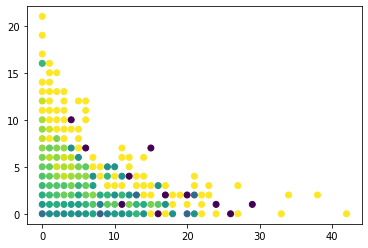

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(summ_df['number_outpatient'], summ_df['number_inpatient'], c=summ_df['readmitted'])

plt.show()

In [30]:
summ2_df = train_df.groupby(['number_diagnoses','num_medications'])['readmitted'].mean().reset_index()
summ2_df.columns = ['number_diagnoses','num_medications','readmitted']
summ2_df.tail()

,number_diagnoses,num_medications,readmitted
515,16,28,0.0
516,16,29,1.0
517,16,31,0.0
518,16,48,0.0
519,16,52,0.0


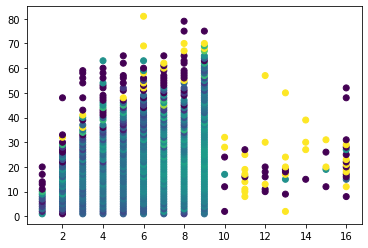

In [31]:
fig, ax = plt.subplots()

ax.scatter(summ2_df['number_diagnoses'], summ2_df['num_medications'], c=summ2_df['readmitted'])

plt.show()